# Exploring the Kaggle Datasets
### Bachelorette Predictor Project - Kwame Taylor

> *(October 14th, 2020):*
> 
> This Jupyter notebook will contain data preperation and data exploration of the Kaggle datasets from user <a href="https://www.kaggle.com/brianbgonz/the-bachelorette-contestants">brianbgonz</a>.
> 
> No goals as of now, just exploration to get a good look at the data -- so I can keep it in mind for future iterations of my project.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats

import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(13, 11))
plt.rc('font', size=14)

**Import data from .csv to pandas DataFrame - Contestants from the Bachelorette past seasons**

In [2]:
# read the csv into a dataframe
df = pd.read_csv("bachelorette-contestants.csv", index_col=5)
df.head()

,Name,Age,Occupation,Hometown,ElimWeek
Season,,,,,
1,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0
1,Russ,30,Writer,"San Rafael, California",5.0
1,Greg T.,28,Importer,"Manhattan, New York",4.0
1,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0


### Summarize the Raw Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 1 to 12
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        282 non-null    object 
 1   Age         282 non-null    int64  
 2   Occupation  282 non-null    object 
 3   Hometown    282 non-null    object 
 4   ElimWeek    271 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.2+ KB


In [4]:
df.shape

(282, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,282.0,29.109929,2.996791,23.0,27.0,29.0,31.0,42.0
ElimWeek,271.0,3.520295,2.555777,1.0,1.0,3.0,5.0,10.0


In [6]:
# check for nulls
df.isnull().sum()

Name           0
Age            0
Occupation     0
Hometown       0
ElimWeek      11
dtype: int64

### Data Tidying

In [7]:
# show contestants who are missing ElimWeek
df[df.ElimWeek.isnull()]

,Name,Age,Occupation,Hometown,ElimWeek
Season,,,,,
1,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN
2,Ian McKee,29,Equity Research Sales,"New York, New York",NaN
4,Jesse Csincsak,26,Professional snowboarder,"Breckenridge, Colorado",NaN
5,Ed Swiderski,29,Technology Consultant,"Monroe, Michigan",NaN
6,Roberto Martinez,26,Insurance Agent,"Tampa, Florida",NaN
7,J.P. Rosenbaum,34,Construction Manager,"Roslyn, New York",NaN
8,Jef Holm,27,Entrepreneur,"St. George, Utah",NaN
9,Chris Siegfried,27,Mortgage Broker,"McMinnville, Oregon",NaN
10,Josh Murray,29,Former Professional Baseball Player,"Athens, Georgia",NaN


> I'll replace NaNs with 0.0 for now. Those contestants may have quit the show, or been disqualified outside of rose ceremony elimination. I'll look into that later.

In [8]:
df.ElimWeek = df.ElimWeek.fillna(0.0)
df.isnull().sum()

Name          0
Age           0
Occupation    0
Hometown      0
ElimWeek      0
dtype: int64

In [9]:
df.nunique()

Name          279
Age            18
Occupation    228
Hometown      242
ElimWeek       11
dtype: int64

### Train, Validate, Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_validate, test = train_test_split(df, test_size=.2, random_state=666)
train, validate = train_test_split(train_validate, test_size=.3, random_state=666)

print(f'shape of train: {train.shape}')
print(f'shape of validate: {validate.shape}')
print(f'shape of test: {test.shape}')

shape of train: (157, 5)
shape of validate: (68, 5)
shape of test: (57, 5)


### Data Visualization

Text(0.5, 1.0, 'Which contestants lasted the most weeks, by season and age?')

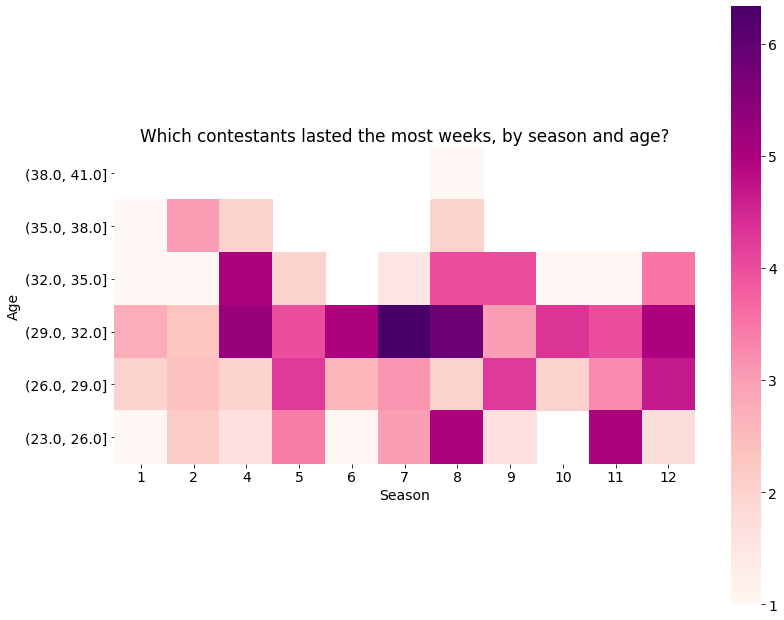

In [31]:
# pandas pivot
heatmap1_data = pd.pivot_table(train, values='ElimWeek', 
                     index=pd.cut(train['Age'], bins=6, precision=0), 
                     columns='Season')
heatmap1_data.sort_index(inplace=True, ascending=False)
sns.heatmap(heatmap1_data, cmap="RdPu", square=True)
plt.title('Which contestants lasted the most weeks, by season and age?')